In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [8]:
X,Y=make_classification(n_classes=2,n_samples=400,random_state=3,n_clusters_per_class=1,n_features=2,n_informative=2,n_redundant=0)

In [77]:
Y[Y==0]=-1

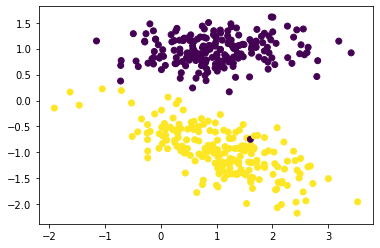

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [107]:
class SVM:
    def __init__(self,c=1.0):
        self.C=c
        self.W=0
        self.b=0
        
    def hingeLoss(self,W,b,X,Y):
        loss=0.0
        loss+=0.5*np.dot(W,W.T)
        
        m=X.shape[0]
        
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        losses=[]
        
        n=learning_rate
        c=self.C
        
        W=np.zeros((1,no_of_features))
        bias=0
        
        # training part
        
        for i in range(maxItr):
            l=self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                gradw=0
                gradb=0
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb=c*Y[i]
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        
        self.W = W
        self.b = bias
        return W,bias,losses
                    
        

In [155]:
mysvm=SVM(c=0.5)

In [156]:
W,bias,losses=mysvm.fit(X,Y,maxItr=300)

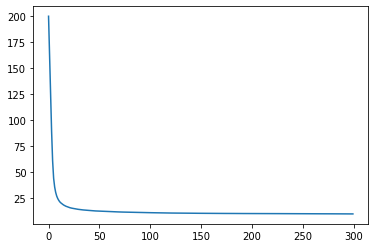

10.147540525695826


In [157]:
plt.plot(losses)
plt.show()
print(np.min(losses))

In [158]:
def plothyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1=np.linspace(-2,4,10)
    x_2=-(w1*x_1+b)/w2
    x_p=-(w1*x_1+b+1)/w2
    x_n=-(w1*x_1+b-1)/w2
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.plot(x_1,x_2)
    plt.plot(x_1,x_p,label="hyperplane WX+B=-1")
    plt.plot(x_1,x_n,label="hyperplane WX+B=1")
    plt.legend()
    plt.show()
    

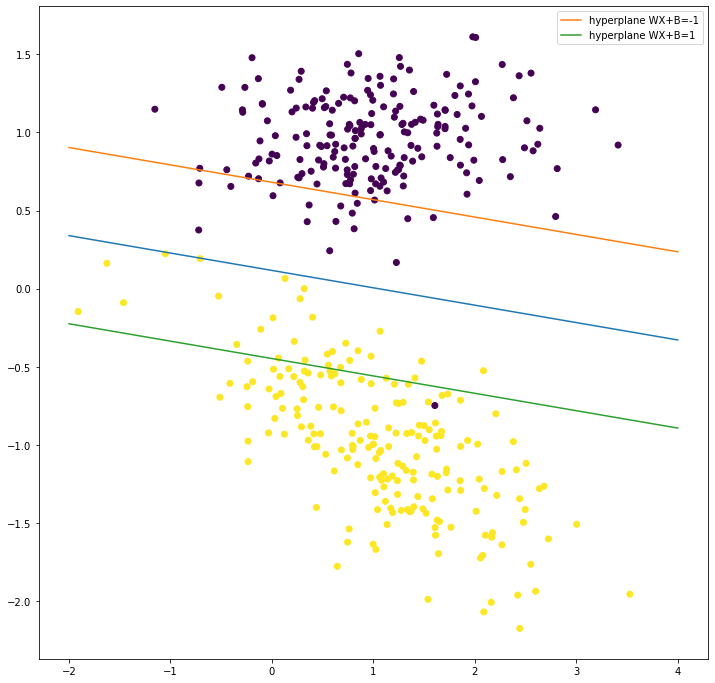

In [159]:
plothyperplane(W[0,0],W[0,1],bias)